<a href="https://colab.research.google.com/github/danielgouveia0/projetos/blob/main/newyork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise dos Dados do Airbnb - *Nova York, Estados Unidos*

Desde de 2008, hóspedes e anfitriões têm usado o Airbnb com o objetivo de expandir as possibilidades de viagem ao redor do planeta, proporcionando uma maneira única e mais personalizada de experienciar o mundo. Amplamente reconhecido, o Airbnb já conta com mais de 150 milhões de usuários ativos.

O Airbn providencia dados de algumas das principais cidades do mundo, desta forma tornando possível o desenvolvimento de projetos e soluções de Data Science. Esses dados podem ser encontrados no [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Antes de tudo, importarei as bibliotecas que serão usadas nesta análise.
* Pandas e Numpy para a análise dos dados;
* Seaborn, Pywaffle e Matplotlib para a visualização de dados;
* Geopandas para a criação de mapas.


In [1]:
#importando as bibliotecas
!pip install pywaffle -q
!pip install geopandas -q
from pywaffle import Waffle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
import numpy as np
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 32.7 MB/s eta 0:00:00


Os dados usados serão os disponilizados no site do Airbnb. Para esta análise em particular escolhi o documento csv que contém maior quantidade de informações.

In [2]:
#importando os dados
df = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/listings.csv.gz')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Após a importação dos dados, é necessário que compreendamos o dataset fazendo o uso de algumas técnicas primárias. Com os atributos do `shape` chamarei à tela as dimensões dos nossos dados, ou seja, a quantidade de entradas e colunas que o compõe. 

In [3]:
#descobrindo as dimensões do dataset
print('Entradas: {}'.format(df.shape[0]))
print('Colunas: {}'.format(df.shape[1]))

Entradas: 39881
Colunas: 75


Vejamos as primeiras e últimas linhas do dataset:

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20220907064715,2022-09-07,city scrape,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,...,5.00,4.75,4.88,NaN,f,9,1,6,2,0.11
1,2595,https://www.airbnb.com/rooms/2595,20220907064715,2022-09-07,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.31
2,5121,https://www.airbnb.com/rooms/5121,20220907064715,2022-09-07,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.31
3,45910,https://www.airbnb.com/rooms/45910,20220907064715,2022-09-07,city scrape,Beautiful Queens Brownstone! - 5BR,"<b>The space</b><br />Beautiful, fully furnish...",NaN,https://a0.muscache.com/pictures/27117627/19ff...,204539,...,5.00,4.82,4.55,NaN,f,6,6,0,0,0.10
4,5136,https://www.airbnb.com/rooms/5136,20220907064715,2022-09-07,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03


In [5]:
df.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
39876,43728504,https://www.airbnb.com/rooms/43728504,20220907064715,2022-09-08,previous scrape,Private Modern House by The Beach,Private modern house by the Beach with all com...,Rockaway Beach is a neighborhood that gives it...,https://a0.muscache.com/pictures/6c950656-b090...,23049030,...,5.00,4.94,4.88,NaN,f,1,1,0,0,1.22
39877,44578886,https://www.airbnb.com/rooms/44578886,20220907064715,2022-09-08,previous scrape,Beautiful apartment - minutes to NYC,Our apartment is straight across the river fro...,Our apartment is located in a very interesting...,https://a0.muscache.com/pictures/dd5163c1-7e02...,48009648,...,4.96,4.81,4.85,NaN,f,1,1,0,0,2.12
39878,46355090,https://www.airbnb.com/rooms/46355090,20220907064715,2022-09-08,previous scrape,"1 Bedroom Basement, NEWLY Renovated",With easy access to multiple bus stops and the...,NaN,https://a0.muscache.com/pictures/64c81ee7-b396...,371552251,...,4.36,4.36,4.55,NaN,t,1,1,0,0,0.50
39879,698195550745703156,https://www.airbnb.com/rooms/698195550745703156,20220907064715,2022-09-08,city scrape,"Luxurious private waterfront terrace, 2BR 2BA Apt","This two bed, two bath apartment overlooking t...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,151487807,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
39880,48971505,https://www.airbnb.com/rooms/48971505,20220907064715,2022-09-08,previous scrape,Just Blocks to Grove PATH and JC Med Ctr,Very convenient to the Grove St PATH (5 min wa...,NaN,https://a0.muscache.com/pictures/b12bc7dc-573c...,46201,...,4.73,4.87,4.47,NaN,f,1,0,1,0,0.91


Agora, verificarei o tipo de cada coluna.

In [6]:
#conferindo o tipo de cada coluna
pd.set_option('display.max_rows', None)
pd.DataFrame(df.dtypes, columns=['Tipo de Dados'])

,Tipo de Dados
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
source,object
name,object
description,object
neighborhood_overview,object
picture_url,object
host_id,int64


A variável de mais importância para a nossa análise, a `price` (preço), está como tipo `object` em vez de `float`. Antes de prosseguir, irei transformá-la.

In [ ]:
#transformando o 'price' em float
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)

In [8]:
#price atual
df['price'].dtype

dtype('float64')

Neste momento, irei verificar os valores únicos de algumas variáveis que serão importantes para a análise:
* `neighbourhood_group_cleansed` - grupo de bairro limpo. Ao longo do projeto, chamarei esta variável de "distrito".
* `neighbourhood_cleansed` - bairro limpo





In [9]:
df['neighbourhood_group_cleansed'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [10]:
df['neighbourhood_cleansed'].unique()

array(['Kensington', 'Midtown', 'Bedford-Stuyvesant', 'Ridgewood',
       'Sunset Park', 'Mott Haven', 'Greenpoint', 'East Village',
       'Morningside Heights', 'Upper West Side', 'South Slope',
       'Prospect Heights', 'Park Slope', 'Williamsburg', 'Gowanus',
       'Upper East Side', 'East Harlem', 'Ditmars Steinway', 'Bushwick',
       'Middle Village', 'Fort Greene', 'Crown Heights', 'Harlem',
       "Hell's Kitchen", 'Jamaica', 'Flatbush', 'Clinton Hill',
       'Long Island City', 'Chelsea', 'Brooklyn Heights',
       'Flatiron District', 'Lower East Side', 'Windsor Terrace',
       'Rockaway Beach', 'Chinatown', 'Tribeca', 'Greenwich Village',
       'Financial District', 'Washington Heights', 'Kips Bay',
       'Clason Point', 'Eastchester', 'Carroll Gardens', 'West Village',
       'Forest Hills', 'Murray Hill', 'Nolita', 'Boerum Hill',
       'East Flatbush', 'Astoria', 'Sunnyside', 'St. George',
       'Kingsbridge', 'Gravesend', 'University Heights', 'Gramercy',
       

In [11]:
pd.set_option('display.max_rows', 10)

É comum que ao explorar um dataset nos deparemos com dados ausentes ou incompletos. Para a melhor qualidade da análise, irei limpar esses dados.

In [12]:
#vendo a quantidade de valores ausentes em cada variável
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)[:10]

bathrooms                100.000000
calendar_updated         100.000000
license                   99.987463
host_about                43.559590
neighborhood_overview     41.159951
neighbourhood             41.157443
host_response_time        33.971064
host_response_rate        33.971064
host_acceptance_rate      29.740979
review_scores_value       22.145884
dtype: float64

In [13]:
#excluindo colunas que não serão usadas neste projeto
df.drop(['license', 'last_review', 'bathrooms', 'calendar_updated', 'host_about', 'neighborhood_overview', 'neighbourhood', 'host_response_time', 'host_response_rate',
         'host_acceptance_rate', 'review_scores_value'], axis=1, inplace=True)

In [14]:
#verificando a quantidade de valores nulos na variável reviews_per_month
df['reviews_per_month'].isnull().sum()

8362

In [15]:
#inserindo a mediana do reviews_per_month no lugar dos dados nulos
reviews_median = df.reviews_per_month.median()
df['reviews_per_month'].fillna(reviews_median, inplace=True)

In [16]:
#excluindo o restante de linhas com valores nulos
df.dropna(axis=0, inplace=True)

Depois da limpeza, o dataset se encontra purificado de valores nulos.

In [17]:
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

id                        0.0
listing_url               0.0
minimum_nights            0.0
maximum_nights            0.0
minimum_minimum_nights    0.0
                         ... 
property_type             0.0
room_type                 0.0
accommodates              0.0
bathrooms_text            0.0
reviews_per_month         0.0
Length: 64, dtype: float64

**Uma breve viagem através dos distritos de Nova York**

Nova York é composta por cinco distritos chamados oficialmente de boroughs: Manhattan, Brooklyn, Queens, Bronx e Staten Island. Um borough poderia ser definido de forma similar a um distrito no Brasil.

Cada borough coincide com um condado de Nova Iorque: Manhattan coincide com o Condado de Nova York, Brooklyn com Kings, Queens com Queens, Bronx com Bronx e Staten Island com Richmond. Até 1898, data em que se uniram esses condados, a cidade de Nova York era formada unicamente por Manhattan.

**Manhattan**

Manhattan é o distrito mais conhecido de Nova York e, de fato, a maioria das pessoas pensa que Nova York e Manhattan são sinônimos. Esse distrito tem uma área de 58,7 km², uma população de 1 694 251 habitantes, e uma densidade populacional de 28 873,0 hab/km² (segundo o censo nacional de 2020). O condado de Nova Iorque é um dos menores condados dos Estados Unidos em extensão territorial, e o mais densamente habitado do país. É o terceiro condado mais populoso do estado e o 20º mais populoso dos Estados Unidos.

**Brooklyn**

O Brooklyn é provavelmente o segundo distrito mais conhecido de Nova York depois de Manhattan. O condado tem uma área de 251 km², dos quais 180 km² estão cobertos por terra e 71 km² por água, uma população de 2 736 074 habitantes e densidade populacional de 15 227,1 hab/km² (segundo o censo nacional de 2020). É o condado mais populoso do estado e o sétimo mais populoso do país. Por si só, é o mais populoso dos cinco burgos da cidade de Nova Iorque, abrigando cerca de 31% da população da cidade dentro de seus limites.

**Queens** 

O Queens é o maior distrito de Nova York e, embora não seja tão famoso, é o que está se desenvolvendo de forma cada vez mais veloz. Atualmente, o condado possui 470 km², dos quais 282 km² estão cobertos por terra e 188 km² por água, uma população de 2 405 464 habitantes e uma densidade populacional de 8 542,3 hab/km². É o segundo condado mais populoso do estado, atrás do Condado de Kings e o 11º mais populoso dos Estados Unidos (segundo o censo nacional de 2020). 

**Bronx**

O Bronx é um dos burgos nova-iorquinos mais densamente povoados, sendo em 1874 a primeira área fora de Manhattan a ser incorporada à cidade de Nova Iorque, mais de 20 anos antes dos burgos de Queens, Brooklyn, e Staten Island. Depois de décadas de abandono nos anos 60, 70, e 80, o Bronx é atualmente o distrito de Nova Iorque que mais rapidamente cresce em termos relativos e está perto de alcançar o recorde populacional histórico de 1,451,277 de habitantes em 1950.

**Staten Island**

Staten Island é o distrito mais meridional de Nova York e o mais desconhecido para o público geral. É ligado ao Brooklyn pela Ponte Verrazano-Narrows e a Jersey City pela Ponte Goethals. Chamado de "O 'borough' esquecido", uma vez que é o mais distante deles de Manhattan.

In [18]:
#renomear a coluna
df.rename(columns={'neighbourhood_group_cleansed': 'boroname'}, inplace=True)

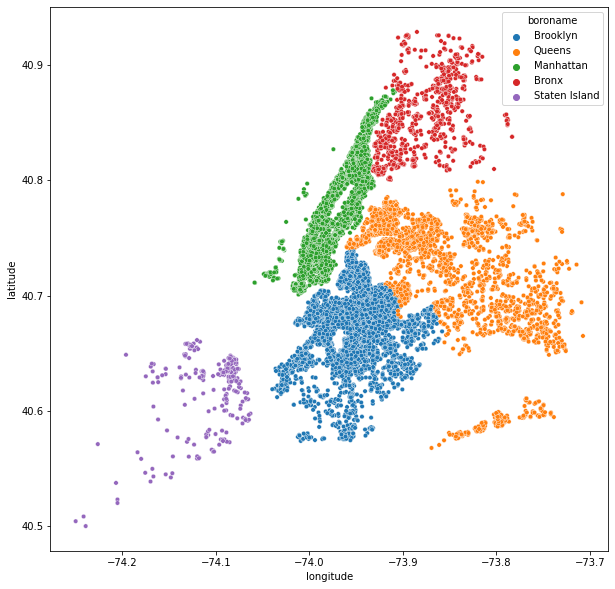

In [19]:
#vendo as listagens por distrito
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='boroname', s=20, data=df);

In [20]:
borough_count = df.groupby('boroname').agg('count').reset_index()

In [21]:
#quantidade de listagens de cada distrito
df['boroname'].value_counts()

Brooklyn         8821
Manhattan        5882
Queens           3134
Bronx             819
Staten Island     243
Name: boroname, dtype: int64

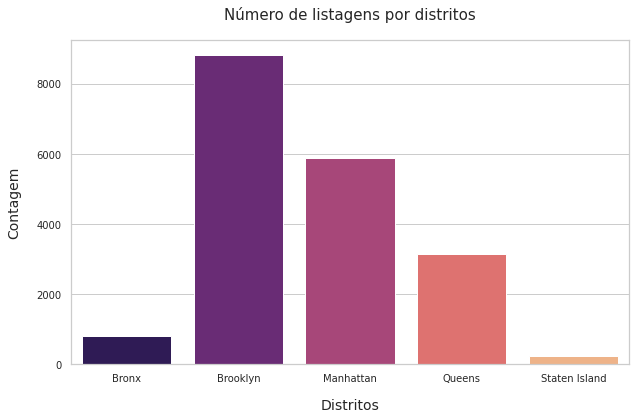

In [22]:
#plot da listagem por distritos
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(data=borough_count, x='boroname', y='id', palette='magma')
ax.axes.set_title('Número de listagens por distritos', fontsize=15, pad=20)
ax.set_xlabel('Distritos', fontsize=14, labelpad=15)
ax.set_ylabel('Contagem', fontsize=14, labelpad=15)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
plt.tight_layout()
plt.show()
                         

A partir do gráfico acima é possível tirar algumas conclusões:
* Brooklyn tem quase 3 mil imóveis disponíveis a mais do que Manhattan; 
* Staten Island e Bronx têm menos de 1000 listagens.

In [23]:
#usando o geopandas para produzir uma camada base dos distritos de Nova York
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [24]:
#renomeando a coluna para boroname
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')

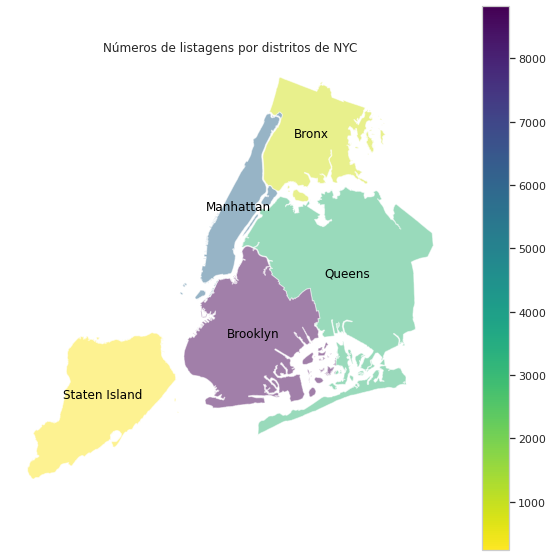

In [25]:
#plotando um mapa dos distritos 
fig, ax = plt.subplots(1,1, figsize=(10,10))
bc_geo.plot(column='id', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
bc_geo.apply(lambda x: ax.annotate(s=x.boroname, color='black', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.title('Números de listagens por distritos de NYC')
plt.axis('off');

Agora irei analisar a variável `price` e verificar se nela existe a presença de outliers.

In [26]:
#usando o describe para ver a presença de possíveis outliers em todas as variáveis
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,...,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000,18899.000000
mean,72655318535977456.000000,20220907064715.000000,89135063.757924,26.323985,36.104397,40.722087,-73.941354,3.000847,1.360971,1.690989,...,4.775905,4.643864,4.840621,4.837718,4.743967,10.450341,6.449706,3.837875,0.081327,1.147112
std,200553856777617280.000000,0.000000,115048006.815954,228.754195,287.537500,0.059469,0.056404,1.976125,0.719292,1.166601,...,0.413830,0.512471,0.360022,0.382812,0.373156,39.359431,33.540008,20.826658,0.868420,1.503604
min,2539.000000,20220907064715.000000,2571.000000,1.000000,1.000000,40.500314,-74.249840,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,10357716.500000,20220907064715.000000,7720737.000000,1.000000,1.000000,40.683155,-73.976645,2.000000,1.000000,1.000000,...,4.730000,4.500000,4.830000,4.830000,4.650000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,27854483.000000,20220907064715.000000,33816358.000000,2.000000,2.000000,40.714930,-73.949690,2.000000,1.000000,1.000000,...,4.900000,4.800000,4.950000,4.960000,4.850000,1.000000,1.000000,0.000000,0.000000,0.510000
75%,48859028.000000,20220907064715.000000,137358866.000000,4.000000,5.000000,40.758287,-73.922010,4.000000,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,2.000000,0.000000,1.670000
max,707272556257060864.000000,20220907064715.000000,476797648.000000,4022.000000,6958.000000,40.928810,-73.707520,16.000000,9.000000,18.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,453.000000,453.000000,288.000000,19.000000,22.870000


In [27]:
#verificando a variável price
df['price'].describe()

count    18899.000000
mean       174.175618
std        254.900663
min         10.000000
25%         75.000000
50%        125.000000
75%        200.000000
max       9999.000000
Name: price, dtype: float64

A variável price, apesar de sua média ser de 174 dólares por noite, seu máximo está como 9999 doláres. Aqui há, com certeza, a presença de outliers; para ilustrá-la, plotarei um boxplot.

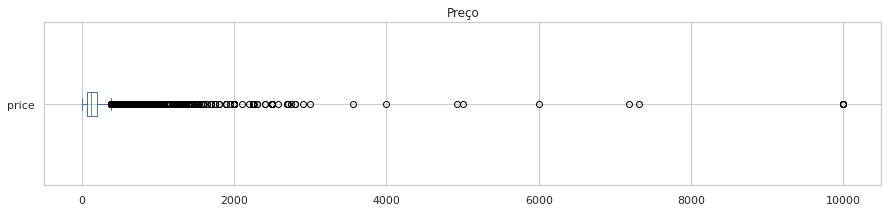

In [28]:
#boxplot da variável price com outliers
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False)
ax.set_title('Preço')
plt.show()

Percebe-se que a representação gráfica da variável está distorcida; há a presença de preços exorbitantes que vão de 6 mil até 10 mil dólares por noite. Limparei os outliers e logo após plotarei um novo boxplot.

A técnica que usarei  para a limpeza dos outliers é muito simples: verificarei o "piso" (o 10º percentil) da variável para descobrir o menor valor e depois a "tampa" (o 90º percentil) para o maior valor. Nas linhas abaixo serão exibidos o 10º e o 90º percentil do `price`.

In [29]:
#verificando o quantile
print(df['price'].quantile(0.10))
print(df['price'].quantile(0.90))

52.0
314.0


Agora irei remover os valores que estão abaixo de 52.0 e acima de 314.0. Finalmente, veremos a "skew", que explica até que ponto os dados estão normalmente distribuídos. Idealmente, o valor da "skewness" deve ser entre -1 e +1, e qualquer desvio que ultrapasse esse range indica a presença de valores extremos.


In [30]:
#excluindo os outliers e verificando a skew
df['price'] = np.where(df['price'] < 51.0, 51.0, df['price'])
df['price'] = np.where(df['price'] > 314.0, 314.0, df['price'])
print(df['price'].skew())

0.7309670711050787


Para ver como está a variável após descongestionada, plotarei mais um boxplot.

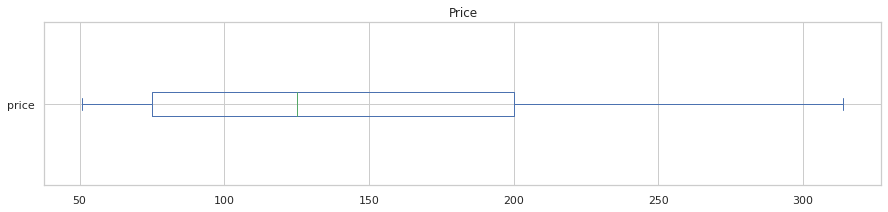

In [31]:
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False)
ax.set_title('Price')
plt.show()

Neste momento é possível ver ilustradas as informações obtidas com o `describe`: a mediana valendo 125.0, o 25% valendo 75.0 e o 75% valendo 200.0.


In [32]:
#describe do price após expurgação
df['price'].describe()

count    18899.000000
mean       147.798878
std         85.199242
min         51.000000
25%         75.000000
50%        125.000000
75%        200.000000
max        314.000000
Name: price, dtype: float64

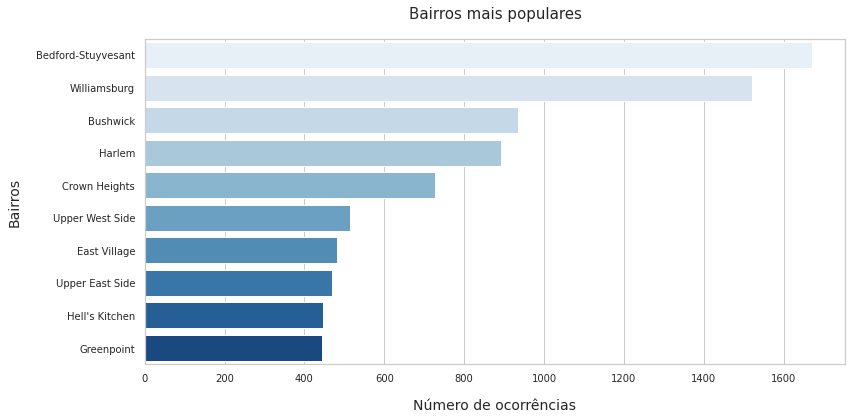

In [33]:
#plotando gráficos das neighbourhood com mais listagens
sns.set(style='whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.axes.set_title('Bairros mais populares', fontsize=15, pad=20)
ax = sns.countplot(y='neighbourhood_cleansed', data=df, order=df['neighbourhood_cleansed'].value_counts().iloc[:10].index, palette = 'Blues')
ax.set_xlabel('Número de ocorrências', fontsize=14, labelpad=15)
ax.set_ylabel('Bairros', fontsize=14, labelpad=15)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
plt.tight_layout()
plt.show()


Com ajuda do gráfico acima podemos tirar alguns insights:
* O bairro "Bedford-Stuyvesant", do Brooklyn, é o que contém mais listagens;
* Dos dez bairros com mais listagens, 5 são do Brooklyn (Bedford-Stuyvesant, Williamsburg, Bushwick, Crown Heights e Greenpoint);
* E os outros cinco bairros (Harlem, Upper West Side, East Village, Uper East Side e Hell's Kitchen) fazem parte do distrito de Manhattan. 


**Algumas informações sobre os tipos de quarto**

Os anfitriões no Airbnb oferecem uma grande variedade de acomodações, desde quartos compartilhados até ilhas particulares. Existem quatro tipos de acomodações: lugares inteiros, quartos inteiros, quartos de hotel e quartos compartilhados.

*Lugares inteiros (Entire home/apt)*

Lugares inteiros são recomendados para quem procura uma casa acolhedora quando se está longe da sua. Em um lugar inteiro, você terá o espaço todo só para você. Geralmente, esse tipo de acomodação conta com quarto, banheiro, cozinha e entrada separada e exclusiva. Os anfitriões devem indicar na descrição se estarão na propriedade ou não (por exemplo: "O anfitrião ocupa o primeiro andar da casa") e fornecer mais informações sobre a acomodação.

*Quartos inteiros (Private room)*

Quartos inteiros são ótimos para quem prefere um pouco de privacidade, mas deseja conhecer pessoas do local. Ao reservar um quarto inteiro, o quarto será só seu, mas você poderá compartilhar áreas comuns com outras pessoas. Talvez você precise passar por espaços internos ocupados pelo anfitrião ou outros hóspedes para ir ao seu quarto.

*Quartos de hotel (Hotel room)*

Os quartos de hotel, privados ou compartilhados, oferecem o nível de serviço e a hospitalidade associados aos hotéis tradicionais. Os quartos estão disponíveis em hotéis boutique ou lifestyle, albergues, pousadas e propriedades semelhantes. De modo geral, há áreas comuns mais animadas e os quartos têm um estilo único.

*Quartos compartilhados (Shared room)*

Quartos compartilhados são recomendados para quem não se importa em dividir o espaço com outras pessoas. Ao reservar um quarto compartilhado, você estará dividindo tanto o quarto quanto o espaço como um todo com outras pessoas. Eles são ideais para os viajantes mais flexíveis, que querem fazer novos amigos e economizar na estadia.


In [34]:
#verificando a listagem dos tipos de quarto
(df['room_type'].value_counts() / df.shape[0])*100

Entire home/apt    55.955342
Private room       42.256204
Shared room         1.375734
Hotel room          0.412720
Name: room_type, dtype: float64

In [35]:
#colocando os dados da variável room_type num dicionário
room = df.room_type.value_counts().to_dict()

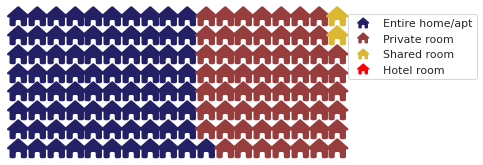

In [36]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=8,
                columns=18,
                colors=("#232066", "#983D3D", "#DCB732", 'red'),
                values=room, icons='house', icon_size=20,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();

Alguns insights:
* A "casa inteira" é o tipo de quarto com mais listagens (55%);
* O "quarto inteiro" ou "quarto privado" é o segundo tipo de quarto mais listado (42%).



In [37]:
#colocando os bairros mais populares numa variável
top_neighbourhood = df['neighbourhood_cleansed'].value_counts()[:6].index
df_plot = df.loc[df['neighbourhood_cleansed'].isin(top_neighbourhood)]

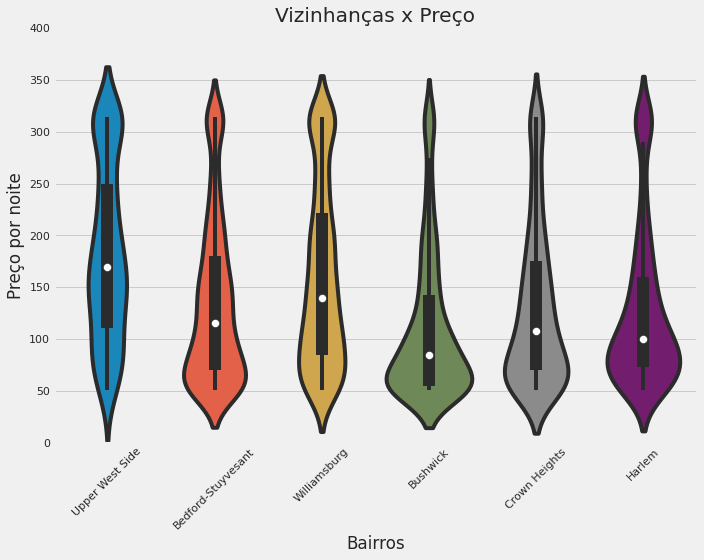

In [51]:
#plotando o preço dos quartos dos bairros mais populares
plt.figure(figsize=(10,8))
sns.violinplot(data=df_plot, x='neighbourhood_cleansed', y='price')
plt.rcParams['font.size'] = 14
plt.xticks(rotation=45)
plt.title('Vizinhanças x Preço')
plt.xlabel('Bairros')
plt.ylabel('Preço por noite')
plt.ylim(0,400)
plt.tight_layout()
plt.show()

Alguns insights:
* A mediana do Upper West Side é a maior dentre todos os bairros;
* A média do preço de um quarto na Upper West Side está na faixa dos 150 dólares por noite.
* A media do preço de um quarto na Bedford-Stuyvesant está na faixa dos 60 dólares por noite.
* Os quartos mais caros estão na Upper West Side e em Willamsburg.
* O bairro onde está a concentração de quartos com preços mais baratos é o Bushwick.

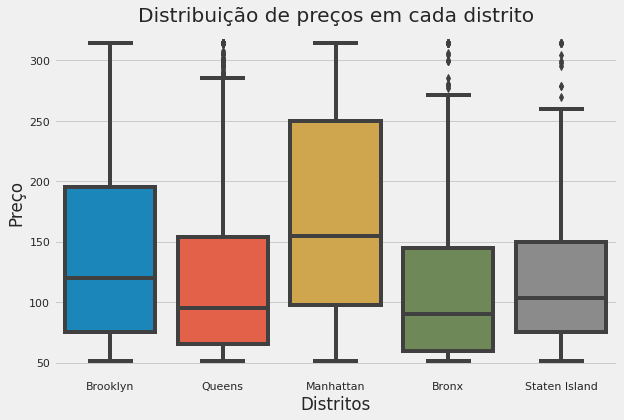

In [39]:
#plotando o preço dos quartos nos distritos
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.boxplot(y='price',x='boroname', data = df)
plt.title('Distribuição de preços em cada distrito')
plt.xlabel("Distritos")
plt.ylabel("Preço")
plt.show()

Alguns insights:
* A mediana de Manhattan é a maior dentre todos os distritos, sendo superior a 150.
* A segunda maior mediana é a do Brooklyn.
* A menor mediana é a do Bronx.
* Os preços dos quartos de Manhattan estão entre 100 e 250 dólares.
* Os preços dos quartos do Brooklyn estão entre 70 e 200 dólares.
* Os preços dos quartos do Bronx estão entre 60 e 150 dólares.

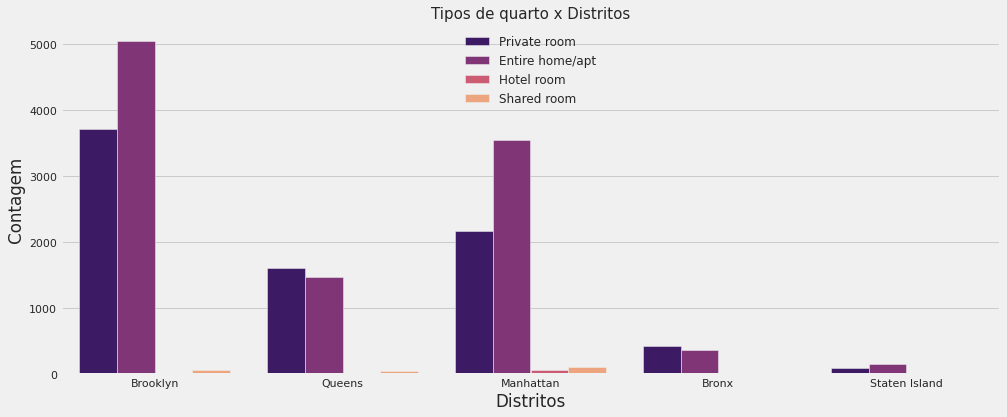

In [40]:
#tipos de quarto em cada distrito
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='boroname', hue='room_type', palette='magma')
plt.title('Tipos de quarto x Distritos', fontsize=15)
plt.xlabel('Distritos')
plt.ylabel('Contagem')
plt.legend(frameon=False, fontsize=12)
plt.tight_layout
plt.show()

Alguns insights:
* A maior parte dos quartos inteiros estão no Brooklyn;
* Os lugares com maior concentração de quartos privados são Brooklyn e Manhattan.

Para finalizar o projeto, plotarei uma wordcloud com as palavras mais usadas pelos usuários ao descreverem seus imóveis.

In [41]:
#importando bibliotecas
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [42]:
description = df['description']


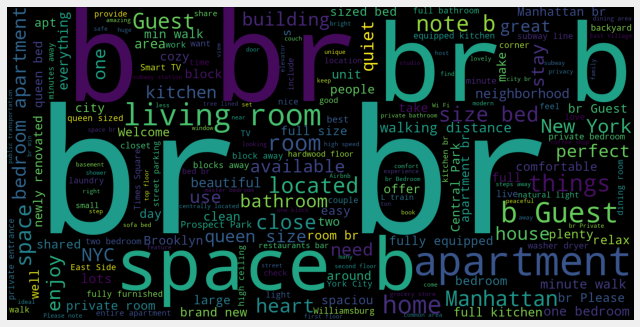

In [43]:
#concatenar as palavras 
all_description = ' '.join(s for s in description)
#lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(['it', 'has', 'our', 'my', 'at', 'in', 'on', 'over', 'this', 'that', 'place', 'access','lot', 'will', 'thing'])
#gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600, height=800).generate(all_description)
#mostrar a imagem final 
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);


***Algumas conclusões:***

* Manhattan e Brooklyn são os distritos mais famosos, contendo o maior número de imóveis, e também os mais caros.

* Bronx e Staten Island não parecem ser a preferência das pessoas que desejam fazer uma visita a Nova York.

* Ao escolherem um imóvel, os viajantes têm como preferência as casas inteiras e os quartos privados.

* Ao procurarem um lugar para ficar, a quantidade de banheiros, quartos e o tamanho do imóvel são alguns dos fatores que mais influenciam a escolha dos viajantes.

*Links úteis e referências:*

https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/;

https://www.pluralsight.com/guides/cleaning-up-data-from-outliers;

https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e;

https://www.airbnb.com.br/help/article/5